In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#metrics is used to evaluate accuracy, to evaluate the r score

DATA COLLECTION AND PREPROCESSING

In [5]:
#Loading csv data to a pandas dataframe
gold_data = pd.read_csv('PycharmProjects/MachineLearning/content/gld_price_data.csv')

In [6]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#can also use forecasting using LSTM

In [8]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [11]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
# checking the number of missing values
gold_data.isnull().sum()
#do check out imputation method incase values are missing

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# getting the statistical measures of the data
gold_data.describe()
##this is a very useful function

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION:
1) POSITIVE CORRELATION
2) NEGATIVE CORRELATION
* it tells us which all columns are interrelated
* in +ve corr. variables are directly proportional
* in -ve corr. var. are inversely proportional


In [15]:
correlation= gold_data.corr()

<AxesSubplot:>

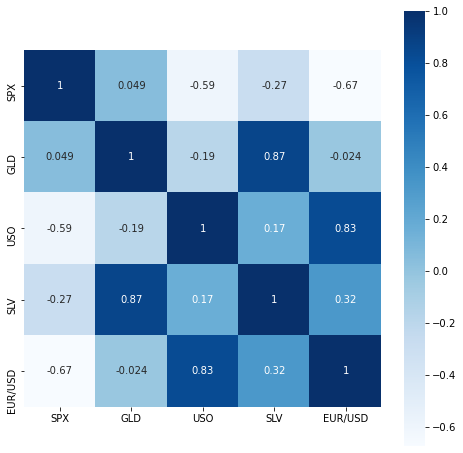

In [24]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, annot=True, square=True, cbar= True, cmap='Blues' )

In [27]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ishit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

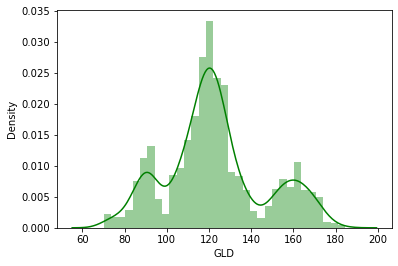

In [28]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

SPLITTING THE FEATURES (Spx etc.) AND TARGET (Gold price) 

In [29]:
# axis=1 for column
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [42]:
regressor = RandomForestRegressor(n_estimators=100)

In [43]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation:

In [36]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [37]:
print(test_data_prediction)

[168.4317993   81.66799998 116.0835998  127.72020058 120.97410113
 154.69919847 150.43619953 126.15800045 117.53569875 125.88520078
 116.68320119 171.98940031 141.74169909 167.76589813 115.21880032
 117.8986004  139.5711033  170.18630044 159.49720269 157.49259909
 155.11619972 125.32209978 175.75639934 157.53470384 125.25480044
  93.62869945  78.26929982 120.65410026 119.0851993  167.54020058
  88.22020059 125.21150016  91.36300085 117.63750007 121.14089917
 136.15450187 115.50360104 115.5572007  147.04919998 107.29830049
 104.79760273  87.1438978  126.46770006 117.8954002  152.27789919
 119.62620024 108.27110022 108.17279818  93.20100045 127.03699805
  75.44710012 113.78189932 121.3804002  111.13699914 118.82379892
 120.30759979 159.16220026 168.23340134 146.88719679  85.47849818
  94.45920024  86.82179902  90.60739999 118.69470062 126.37760091
 127.51979987 169.50480049 122.34869935 117.45569883  98.41430026
 167.76250126 142.85589863 131.67430275 121.12320247 121.05559986
 119.62320

In [38]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893392959824372


Compare the actual values and predicted values in a plot

In [39]:
Y_test= list(Y_test)

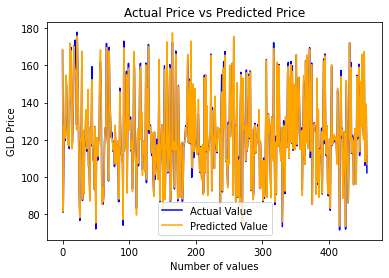

In [45]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()